<a href="https://colab.research.google.com/github/Naitik582/FUTURE_DS_01/blob/main/Social_Media_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload ()

Saving sentimentdataset.csv to sentimentdataset (1).csv


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sentimentdataset.csv")

# Show first few rows
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing countries if needed
df['Country'] = df['Country'].fillna('Unknown')

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Hour, Day, Month, Year if not already present
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [21]:
from textblob import TextBlob

# Create new sentiment score column
df['Polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiment (optional, if recomputing)
def get_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Computed_Sentiment'] = df['Polarity'].apply(get_sentiment)

In [7]:
from collections import Counter

# Combine all hashtags
all_hashtags = df['Hashtags'].dropna().str.split().sum()

# Count most common hashtags
top_hashtags = Counter(all_hashtags).most_common(10)

print("Top 10 Trending Hashtags:")
for tag, count in top_hashtags:
    print(f"{tag}: {count}")

Top 10 Trending Hashtags:
#Serenity: 15
#Gratitude: 13
#Excitement: 13
#Despair: 11
#Nostalgia: 11
#Contentment: 10
#Curiosity: 10
#Awe: 9
#Grief: 9
#Loneliness: 9


In [8]:
# Sentiment by Platform
platform_sentiment = df.groupby(['Platform', 'Sentiment']).size().unstack()

# Likes & Retweets by Sentiment
engagement = df.groupby('Sentiment')[['Likes', 'Retweets']].sum()

In [9]:
# Save cleaned & processed data for Power BI/Excel
df.to_csv("processed_sentiment_data.csv", index=False)

<ipython-input-19-82013c98a1fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="pastel")


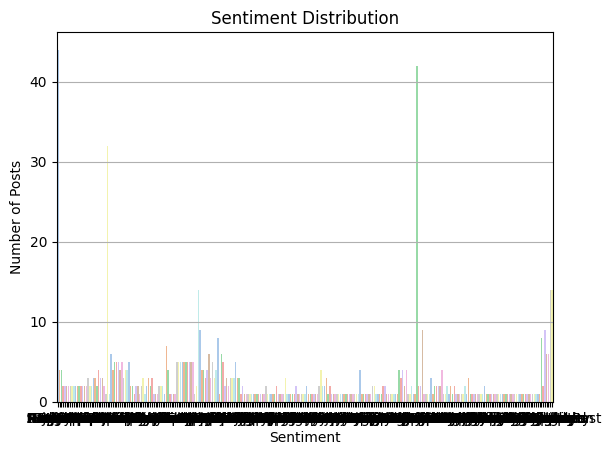

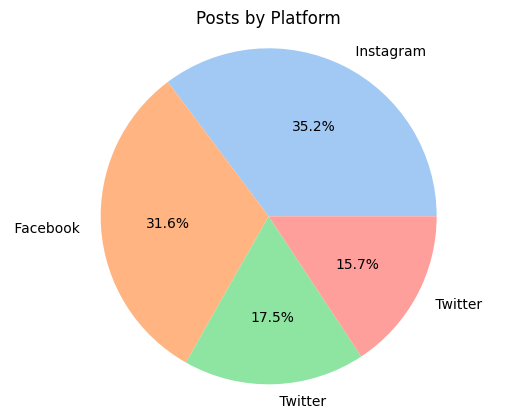

<ipython-input-19-82013c98a1fb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_engagement, x="Country", y="Engagement", palette="pastel")


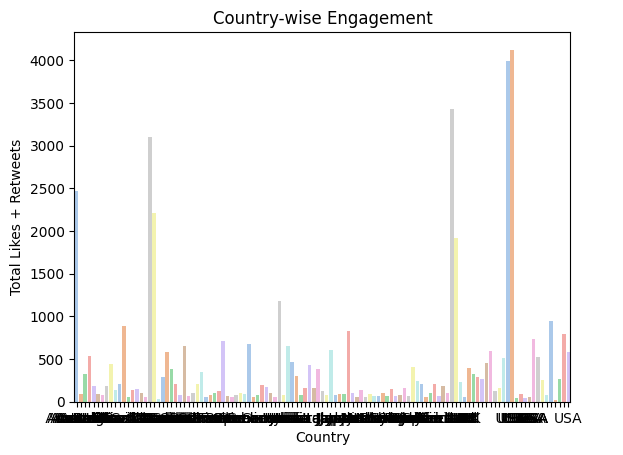

<ipython-input-19-82013c98a1fb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Hour", palette="pastel")


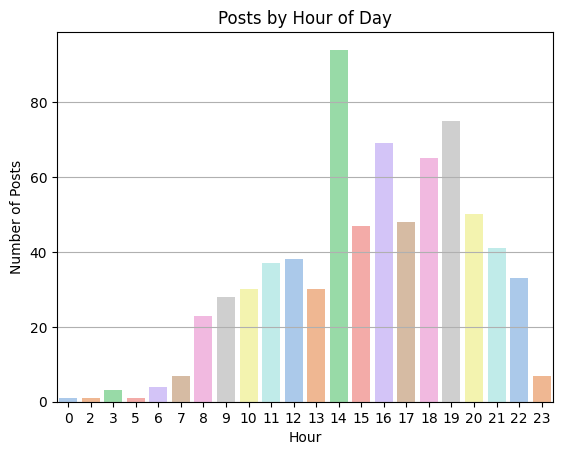

In [19]:
# Sentiment Distribution (Bar Chart)
sns.countplot(data=df, x="Sentiment", palette="pastel")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.grid(axis='y')
plt.show()

# Platform-wise Posts (Pie Chart)
platform_counts = df["Platform"].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Posts by Platform")
plt.axis('equal')
plt.show()

# Country-wise Engagement (Likes + Retweets)
df["Engagement"] = df["Likes"] + df["Retweets"]
country_engagement = df.groupby("Country")["Engagement"].sum().reset_index()
sns.barplot(data=country_engagement, x="Country", y="Engagement", palette="pastel")
plt.title("Country-wise Engagement")
plt.ylabel("Total Likes + Retweets")
plt.show()

# Hourly Post Frequency
sns.countplot(data=df, x="Hour", palette="pastel")
plt.title("Posts by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Posts")
plt.grid(axis='y')
plt.show()